# The UNSW-NB15 Dataset

## Fuente: https://research.unsw.edu.au/projects/unsw-nb15-dataset

In [ ]:
import pandas as pd
import os

data_path = "/content/drive/MyDrive/QuintuSCAN/data/"
data1 = pd.read_csv(data_path+"UNSW-NB15_1.csv")
data2 = pd.read_csv(data_path+"UNSW-NB15_2.csv")
data3 = pd.read_csv(data_path+"UNSW-NB15_3.csv")
data4 = pd.read_csv(data_path+"UNSW-NB15_4.csv")
dataset = pd.concat([data1, data2, data3, data4], ignore_index=True)
dataset.fillna(0, inplace=True)

<ipython-input-1-84988a3f857b>:5: DtypeWarning: Columns (3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv(data_path+"UNSW-NB15_1.csv")
<ipython-input-1-84988a3f857b>:6: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv(data_path+"UNSW-NB15_2.csv")


In [ ]:
del data1, data2, data3, data4

In [ ]:
dataset

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,0,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,0,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,0,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,0,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014017,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,0,0
2014018,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,0,0
2014019,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,0,0
2014020,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,0,0


In [ ]:
dataset.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload',
       'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label'],
      dtype='object')

# Categóricos a Numéricos
Para convertir variables categróricas como el "protocolo", a numéricas de estilo binario: "dummies"

In [ ]:
# Dummies para variables categóricas:
dataset["service"] = dataset["service"].replace("-", "none")
dataset = pd.get_dummies(dataset, columns=["proto", "state", "service"])

# Las IPS las maneja como string:
dataset[["srcip", "dstip"]] = dataset[["srcip", "dstip"]].astype(str)

In [ ]:
for variable in dataset.columns:
  print(variable)
print("Columnas: ", len(dataset.columns))

srcip
sport
dstip
dsport
dur
sbytes
dbytes
sttl
dttl
sloss
dloss
Sload
Dload
Spkts
Dpkts
swin
dwin
stcpb
dtcpb
smeansz
dmeansz
trans_depth
res_bdy_len
Sjit
Djit
Stime
Ltime
Sintpkt
Dintpkt
tcprtt
synack
ackdat
is_sm_ips_ports
ct_state_ttl
ct_flw_http_mthd
is_ftp_login
ct_ftp_cmd
ct_srv_src
ct_srv_dst
ct_dst_ltm
ct_src_ ltm
ct_src_dport_ltm
ct_dst_sport_ltm
ct_dst_src_ltm
attack_cat
Label
proto_3pc
proto_a/n
proto_aes-sp3-d
proto_any
proto_argus
proto_aris
proto_arp
proto_ax.25
proto_bbn-rcc
proto_bna
proto_br-sat-mon
proto_cbt
proto_cftp
proto_chaos
proto_compaq-peer
proto_cphb
proto_cpnx
proto_crtp
proto_crudp
proto_dcn
proto_ddp
proto_ddx
proto_dgp
proto_egp
proto_eigrp
proto_emcon
proto_encap
proto_etherip
proto_fc
proto_fire
proto_ggp
proto_gmtp
proto_gre
proto_hmp
proto_i-nlsp
proto_iatp
proto_ib
proto_icmp
proto_idpr
proto_idpr-cmtp
proto_idrp
proto_ifmp
proto_igmp
proto_igp
proto_il
proto_ip
proto_ipcomp
proto_ipcv
proto_ipip
proto_iplt
proto_ipnip
proto_ippc
proto_ipv6
proto_ip

# Balance
Midiendo la cantidad de instancias para clases para valorar resampling

In [ ]:
unique_labels = dataset["Label"].value_counts()
print(unique_labels)

0    1714919
1     299103
Name: Label, dtype: int64


In [ ]:
# Imbalance ratio:
print("Clase 0:", unique_labels[0])
print("Clase 1:", unique_labels[1])
imbalance_ratio = unique_labels[0] / unique_labels[1]
print("Distribución (Imbalance Ratio) (Clase 0 : Clase 1):", imbalance_ratio)

# Imbalance ratio threshold:
if imbalance_ratio > 10:
    print("Desbalance :c")
else:
    print("Relativamente balanceado ;:T")

Clase 0: 1714919
Clase 1: 299103
Distribución (Imbalance Ratio) (Clase 0 : Clase 1): 5.733539951120517
Relativamente balanceado ;:T


# Mapeo Multiclase
Las instancias con clase "1" (anomalía) contienen en "attack_cat", que es el tipo de ataque; se creará una nueva columna "attack" con un mapeo numérico de los tipos de ataque; los que tengan "0" en "Label" tendrán un "0" en "attack":

[0] Para Label "0"

[1] Generic

[2] Fuzzers

[3] Analysis

[4] Backdoors

[5] DoS

[6] Exploits

[7] Reconnaissance

[8] Shellcode

[9] Worms

In [ ]:
dataset["attack_cat"] = dataset["attack_cat"].str.strip()
attack_categories = dataset["attack_cat"].value_counts()
print(attack_categories)

Generic           207961
Exploits           39138
Fuzzers            19195
DoS                15189
Reconnaissance     12236
Analysis            2151
Backdoor            1795
Shellcode           1288
Worms                150
Name: attack_cat, dtype: int64


In [ ]:
# Mapeo de ataques:
attack_mapping = {
    "": 0,
    "Generic": 1,
    "Fuzzers": 2,
    "Analysis": 3,
    "Backdoor": 4,
    "DoS": 5,
    "Exploits": 6,
    "Reconnaissance": 7,
    "Shellcode": 8,
    "Worms": 9
}
dataset["attack"] = dataset["attack_cat"].map(attack_mapping)
dataset.loc[dataset["Label"] == 0, "attack"] = 0

In [ ]:
attack_categories = dataset["attack"].value_counts()
print(attack_categories)

0.0    1714919
1.0     207961
6.0      39138
2.0      19195
5.0      15189
7.0      12236
3.0       2151
4.0       1795
8.0       1288
9.0        150
Name: attack, dtype: int64


# Fisher Score
Para comprender el impacto de cada variable en la predicción y reducir dimensionalidad escogiendo sólo las variables más relevantes

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Columnas a ignorar:
ignore = ["srcip", "dstip", "attack_cat", "attack"]
X = dataset.drop(columns=ignore + ["Label"])
y = dataset["Label"]

# Convierte a números las columnas:
X = X.apply(pd.to_numeric, errors="coerce")
# X = X.dropna()
y = y[X.index]

# Calcula el vector de Fisher score:
selector = SelectKBest(score_func=f_classif, k=20)
selector.fit(X, y)

scores_df = pd.DataFrame({"Feature": X.columns, "Fisher Score": selector.scores_})
scores_df = scores_df.sort_values(by="Fisher Score", ascending=False)

print(scores_df)

ValueError: Input X contains NaN.
SelectKBest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
X

,sport,dsport,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,...,service_ftp-data,service_http,service_irc,service_none,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
0,1390,53.0,0.001055,132,164,31,29,0,0,5.004739e+05,...,0,0,0,0,0,0,0,0,0,0
1,33661,1024.0,0.036133,528,304,31,29,0,0,8.767609e+04,...,0,0,0,1,0,0,0,0,0,0
2,1464,53.0,0.001119,146,178,31,29,0,0,5.218945e+05,...,0,0,0,0,0,0,0,0,0,0
3,3593,53.0,0.001209,132,164,31,29,0,0,4.367246e+05,...,0,0,0,0,0,0,0,0,0,0
4,49664,53.0,0.001169,146,178,31,29,0,0,4.995722e+05,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561173,8647,25.0,0.308446,31366,2566,31,29,15,6,7.941747e+05,...,0,0,0,0,0,0,1,0,0,0
561174,4681,5190.0,0.006390,2054,2478,31,29,6,6,2.455086e+06,...,0,0,0,1,0,0,0,0,0,0
561175,47560,6125.0,0.222470,8928,320,31,29,4,1,2.981436e+05,...,1,0,0,0,0,0,0,0,0,0
561176,11047,80.0,0.004158,890,8896,31,29,2,4,1.498798e+06,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
dataset[["proto_aes-sp3-d"]]

,proto_aes-sp3-d
0,0
1,0
2,0
3,0
4,0
...,...
2014017,0
2014018,0
2014019,0
2014020,0


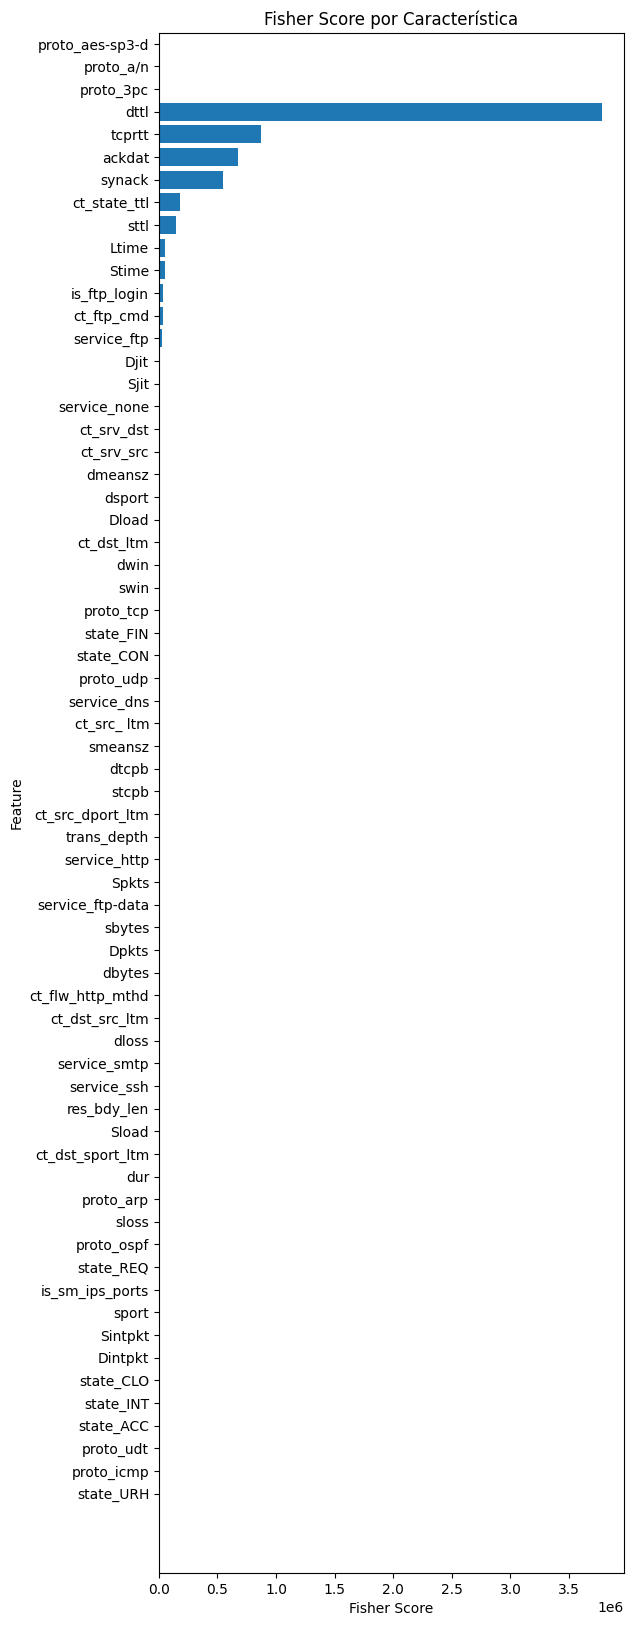

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 20))
plt.barh(scores_df["Feature"], scores_df["Fisher Score"])
plt.xlabel("Fisher Score")
plt.ylabel("Feature")
plt.title("Fisher Score por Característica")
plt.show()

In [ ]:
scores_df

,Feature,Fisher Score
189,state_URH,0.003298
79,proto_icmp,0.003298
162,proto_udt,0.006595
176,state_ACC,0.049467
182,state_INT,0.175452
...,...,...
197,service_irc,NaN
199,service_pop3,NaN
200,service_radius,NaN
202,service_snmp,NaN


In [ ]:
dataset

,srcip,sport,dstip,dsport,dur,sbytes,dbytes,sttl,dttl,sloss,...,service_http,service_irc,service_none,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,attack
0,59.166.0.0,1390,149.171.126.6,53,0.001055,132,164,31,29,0,...,0,0,0,0,0,0,0,0,0,0
1,59.166.0.0,33661,149.171.126.9,1024,0.036133,528,304,31,29,0,...,0,0,1,0,0,0,0,0,0,0
2,59.166.0.6,1464,149.171.126.7,53,0.001119,146,178,31,29,0,...,0,0,0,0,0,0,0,0,0,0
3,59.166.0.5,3593,149.171.126.5,53,0.001209,132,164,31,29,0,...,0,0,0,0,0,0,0,0,0,0
4,59.166.0.3,49664,149.171.126.0,53,0.001169,146,178,31,29,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014017,59.166.0.5,33094,149.171.126.7,43433,0.087306,320,1828,31,29,1,...,0,0,0,0,0,0,0,0,0,0
2014018,59.166.0.7,20848,149.171.126.4,21,0.365058,456,346,31,29,2,...,0,0,0,0,0,0,0,0,0,0
2014019,59.166.0.3,21511,149.171.126.9,21,6.335154,1802,2088,31,29,7,...,0,0,0,0,0,0,0,0,0,0
2014020,59.166.0.9,35433,149.171.126.0,80,2.200934,3498,166054,31,29,2,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Encuentra las columnas con valores NaN
columnas_con_nan = dataset.columns[dataset.isnan().any()].tolist()

# Muestra las columnas con valores NaN
print("Columnas con valores NaN:")
print(columnas_con_nan)

AttributeError: 'DataFrame' object has no attribute 'isnan'